In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
train_data=pd.read_csv("train.csv",encoding="utf-8")

In [71]:
test_data=pd.read_csv("test.csv",encoding="utf-8")

In [72]:
train_data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [73]:
test_data.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",neutral
3,01082688c6,happy bday!,neutral
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [74]:
#clean data
train_data.dropna(inplace=True)

In [75]:
print(train_data.isnull().sum())

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64


In [76]:
#preprocess data

In [77]:
train_data["text"]=train_data["text"].str.lower()


In [78]:
train_data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"i`d have responded, if i were going","I`d have responded, if I were going",neutral
1,549e992a42,sooo sad i will miss you here in san diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [79]:
train_data["selected_text"]=train_data["selected_text"].str.lower()
train_data["sentiment"]=train_data["sentiment"].str.lower()

In [80]:
train_data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"i`d have responded, if i were going","i`d have responded, if i were going",neutral
1,549e992a42,sooo sad i will miss you here in san diego!!!,sooo sad,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"sons of ****, why couldn`t they put them on t...","sons of ****,",negative


In [81]:
test_data["text"]=test_data["text"].str.lower()
test_data["sentiment"]=test_data["sentiment"].str.lower()

In [82]:
test_data.head()

,textID,text,sentiment
0,f87dea47db,last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"recession hit veronique branquinho, she has to...",neutral
3,01082688c6,happy bday!,neutral
4,33987a8ee5,http://twitpic.com/4w75p - i like it!!,positive


In [83]:
#data is preprocessed. There are no null or upper case letters

In [84]:
cols = list(set.intersection(*(set(x.columns) for x in [train_data,test_data])))


In [85]:
new_data = pd.concat([x[cols] for x in [train_data,test_data]], ignore_index=True)

In [86]:
new_data.head()

,sentiment,text,textID
0,neutral,"i`d have responded, if i were going",cb774db0d1
1,negative,sooo sad i will miss you here in san diego!!!,549e992a42
2,negative,my boss is bullying me...,088c60f138
3,negative,what interview! leave me alone,9642c003ef
4,negative,"sons of ****, why couldn`t they put them on t...",358bd9e861


In [87]:
grouped_data=new_data.groupby("sentiment")

In [88]:
grouped_data

In [89]:
for label,group in grouped_data:
    print(label,":",len(group))
    print(group)

negative : 8494
      sentiment                                               text      textID
1      negative      sooo sad i will miss you here in san diego!!!  549e992a42
2      negative                          my boss is bullying me...  088c60f138
3      negative                     what interview! leave me alone  9642c003ef
4      negative   sons of ****, why couldn`t they put them on t...  358bd9e861
12     negative       my sharpie is running dangerously low on ink  74a76f6e0a
...         ...                                                ...         ...
30984  negative    so what was said??  i`m so bummed i missed i...  fa117106ef
30995  negative    im riding the highs and lows of moods now......  c7be378db2
31003  negative   my eyes are starting to hurt. so late. but mu...  036cd6abb0
31009  negative  its at 3 am, im very tired but i can`t sleep  ...  e5f0e6ef4b
31011  negative   i know what you mean. my little dog is sinkin...  6332da480c

[8494 rows x 3 columns]
neutral : 1

In [90]:
#create a document matrix using tfidf, considering each group(positive,negative,neutral) as a document


In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
tfidf = TfidfVectorizer(min_df = 1,max_df = 0.95,stop_words = 'english',max_features = 500)

In [93]:
#Convert the given data in each document into clusters
#First, we need to identify the number of clusters that is to be used.
#For this, we can use a range for the number of clusters and find the minimum squared error sum.

In [94]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

In [95]:
def find_num_clusters(label,tfidf_text,optimal_clusters=100):
    n = range(2,optimal_clusters+1,2)
    min_e=float('inf')
    clusters=float('inf')
    sum_squared_error = []
    for i in n:
        e=MiniBatchKMeans(n_clusters=i,random_state=20,batch_size=4000).fit(tfidf_text).inertia_
        if e<min_e:
            min_e=e
            clusters=i
        sum_squared_error.append(e)
    plt.figure(figsize=(10,10))
    plt.plot(n,sum_squared_error)
    plt.title("Sum of squared error and number of clusters plot for "+str(label)+ " group")
    plt.xlabel("number of clusters:k")
    plt.ylabel("Sum of squared error")
    plt.show()
    return clusters

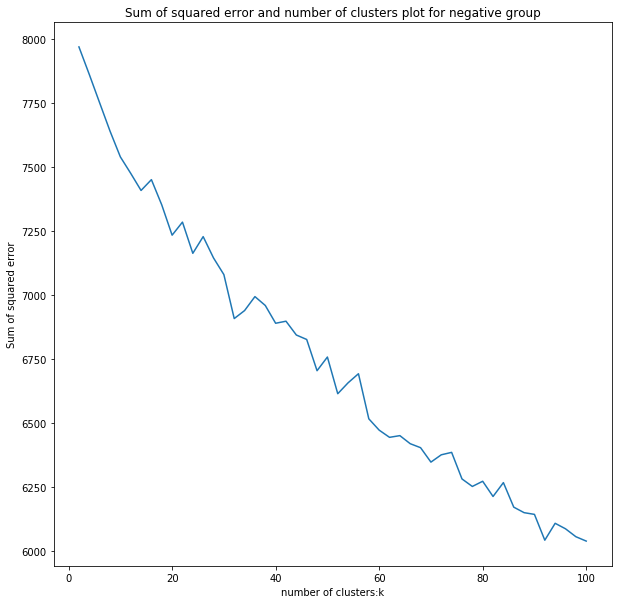

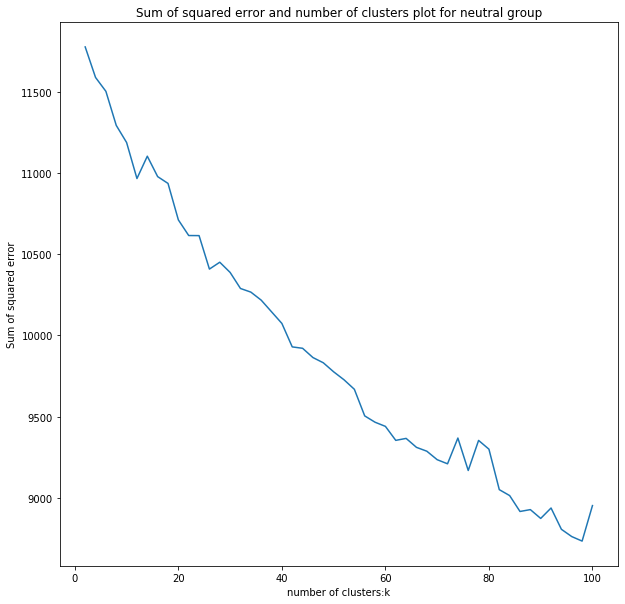

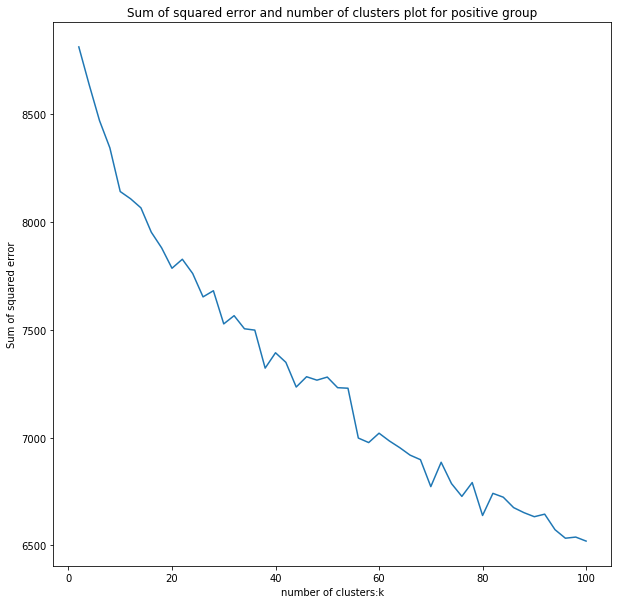

In [96]:
opt_clusters=[]
for name,group in grouped_data:
    tfidf.fit(group.text)
    text = tfidf.transform(group.text)
    c=find_num_clusters(name,text)
    opt_clusters.append(c)

In [97]:
print(opt_clusters)

[100, 98, 100]


In [98]:
#Now we need to cluster

In [99]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm

In [100]:
def plot_with_pca(text,clusters,label): 
    pca=PCA(n_components=2)
    result=pca.fit_transform(text[:,:].todense())
    plt.figure(figsize=(10,10))
    plt.scatter(result[:, 0], result[:, 1],
         c=clusters,edgecolor='none', alpha=0.5)
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.title("Clusters for "+str(label))
    plt.colorbar()
    plt.show()

In [101]:
def get_top_keywords(text, clusters, features, num_top_keywords,label):
    df= pd.DataFrame(text.todense()).groupby(clusters).mean()
    for i,r in df.iterrows():
        print(" Cluster ",i,":",label)
        print(",".join(set(features[y] for y in np.argsort(r)[-num_top_keywords:])))

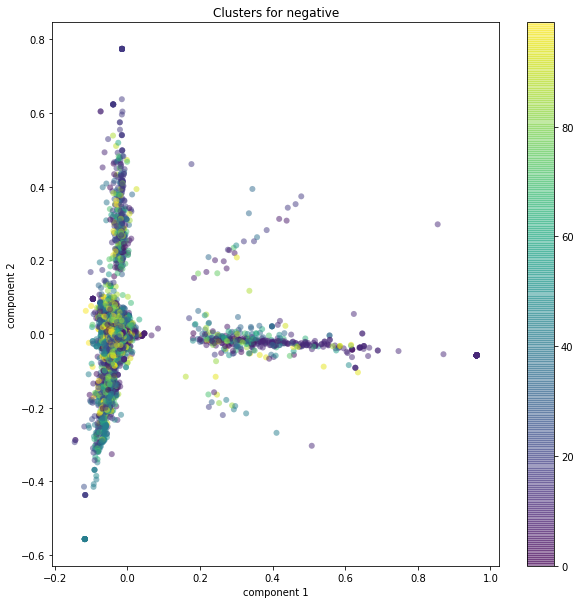

Size of clusters (which is the size of each group of sentiment): (8494,)
 Cluster  0 : negative
wtf,sucks,just,omg,worst,sorry,today,bad,shame,getting
 Cluster  1 : negative
exams,week,time,just,sad,really,days,doing,half,ill
 Cluster  2 : negative
stupid,didn,work,job,wont,ready,tired,going,day,30
 Cluster  3 : negative
sucks,tell,oh,did,hard,man,really,maybe,sorry,today
 Cluster  4 : negative
better,just,feel,good,bad,today,like,dont,feeling,don
 Cluster  5 : negative
broken,got,hate,just,yesterday,stop,leave,bad,car,day
 Cluster  6 : negative
know,tomorrow,just,sad,ll,sorry,like,think,miss,don
 Cluster  7 : negative
didn,long,tomorrow,night,tonight,going,middle,bad,sleep,woke
 Cluster  8 : negative
stupid,lol,time,really,going,headache,day,need,gonna,getting
 Cluster  9 : negative
sucks,oh,work,long,sad,man,sorry,day,movie,im
 Cluster  10 : negative
didn,time,family,just,sad,couldn,guys,sorry,ok,know
 Cluster  11 : negative
watching,did,right,really,going,guys,aww,old,gonna,miss
 Cl

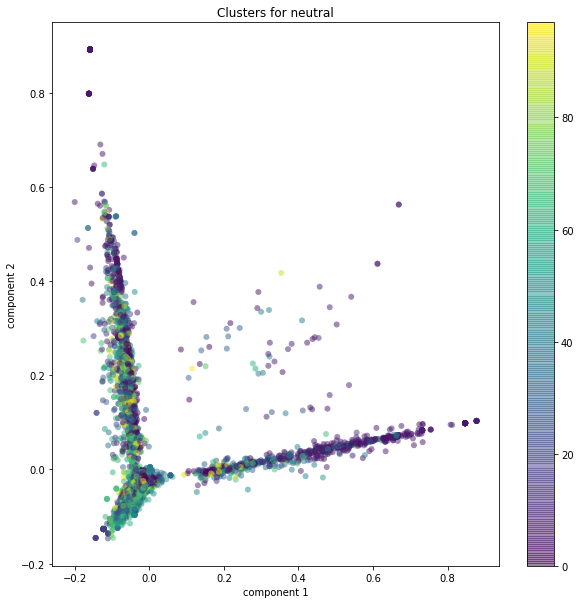

Size of clusters (which is the size of each group of sentiment): (13141,)
 Cluster  0 : neutral
work,day,weather,really,nice,stuck,today,im,office,getting
 Cluster  1 : neutral
holiday,morning,work,bank,really,going,today,day,monday,weekend
 Cluster  2 : neutral
waiting,just,ll,night,really,good,say,ve,think,love
 Cluster  3 : neutral
way,guitar,lol,game,just,tonight,playing,yay,haha,day
 Cluster  4 : neutral
new,got,just,tired,hope,play,wow,twitter,dont,30
 Cluster  5 : neutral
picture,guitar,lol,look,looks,com,pic,day,twitpic,http
 Cluster  6 : neutral
lol,hair,work,got,just,ve,think,home,finished,woke
 Cluster  7 : neutral
morning,got,time,just,com,coffee,good,today,having,need
 Cluster  8 : neutral
new,live,just,photo,check,www,tinyurl,com,twitter,http
 Cluster  9 : neutral
new,early,getting,tomorrow,better,just,night,real,day,hour
 Cluster  10 : neutral
oh,time,right,school,really,going,bed,like,need,home
 Cluster  11 : neutral
glad,morning,youtube,goin,going,goes,god,twitter,gone

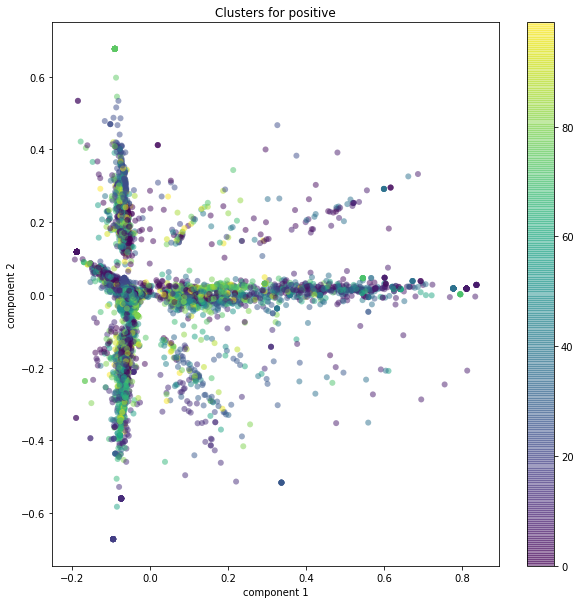

Size of clusters (which is the size of each group of sentiment): (9379,)
 Cluster  0 : positive
tea,work,hot,chocolate,good,say,haha,nice,love,watch
 Cluster  1 : positive
new,got,time,just,ll,good,going,today,love,don
 Cluster  2 : positive
didn,hoping,better,just,good,soon,today,taking,thanks,hear
 Cluster  3 : positive
mother,tomorrow,world,mom,friend,breakfast,day,happy,love,great
 Cluster  4 : positive
mother,dancing,mommies,night,good,mothers,wishing,day,happy,weekend
 Cluster  5 : positive
new,link,good,love,today,sure,following,follow,appreciate,thanks
 Cluster  6 : positive
glad,google,hot,night,good,really,day,think,yummy,girls
 Cluster  7 : positive
mother,wish,mum,wonderful,mommies,mothers,thank,day,happy,love
 Cluster  8 : positive
new,yeah,lol,just,fun,good,like,haha,love,thanks
 Cluster  9 : positive
mother,world,mom,good,mothers,mommy,day,best,happy,love
 Cluster  10 : positive
new,excited,just,ready,looks,good,yay,today,day,getting
 Cluster  11 : positive
lol,just,bett

In [102]:
i=0
kmeans= {}
for label, group in grouped_data:
    tfidf.fit(group.text)
    text = tfidf.transform(group.text)
    km= MiniBatchKMeans(n_clusters=opt_clusters[i],random_state=20,batch_size=4000)
    i+=1
    km.fit(text)
    clusters = km.predict(text)
    plot_with_pca(text,clusters,label)
    kmeans[label.lower()] = km
    print("Size of clusters (which is the size of each group of sentiment):",clusters.shape)
    get_top_keywords(text, clusters, tfidf.get_feature_names(), 10,label)
print(kmeans)

In [103]:
def calculate_jaccard_score(str1,str2):
    if str1 and str2:
        str1=set(str1.lower().split())
        str2=set(str2.lower().split())
        intersect=str1.intersection(str2)
        #jaccard score of str1,str2= length of str1 intersection str2/length of union of str1 and str2
        return len(intersect)/(len(str1)+len(str2)-len(intersect))
    else:
        return 0.0

In [104]:
train_data_with_scores=pd.DataFrame(columns=["text","selected_text","sentiment","keywords","jaccard_score"])

In [105]:
grouped_data=train_data.groupby("sentiment")

In [106]:
def levenshtein(str1,str2):
    if str1 == str2: 
        return 0
    elif len(str1) == 0: 
        return len(str2)
    elif len(str2) == 0: 
        return len(str1)
    dp1=[None]*(len(str1)+1)
    dp2=[None]*(len(str2)+1)
    for i in range(len(dp1)):
        dp1[i]=i
    for i in range(len(str1)):
        dp2[0] = i + 1
        for j in range(len(str2)):
            ct = 0 if str1[i] == str2[j] else 1
            dp2[j + 1] = min(dp2[j] + 1, dp1[j + 1] + 1, dp1[j] + ct)
        for j in range(len(dp1)):
            dp1[j] = dp2[j]

    return dp2[len(str2)]

In [107]:
def get_keywords(line,data, clusters, labels, n_terms,column):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    selected_text = []
    for i,r in df.iterrows():
        n_terms = len(labels)
        key_words = ','.join(set([labels[t] for t in np.argsort(r)[-n_terms:]]))
        for word in line.strip().split():
            for kw in key_words:
                word = word.strip()
                kw = kw.strip()
                ld = 1.0-levenshtein_distance(word,kw)/max(len(word),len(kw))
                if ld > 0.1:
                    selected_text.append(word)
                    break
    return " ".join(selected_text)


In [108]:
ct=0
sz=len(train_data)
print(sz)
for label, grp in grouped_data:
    for grp_text,selected_text in zip(grp.text,grp.selected_text):
        text = tfidf.transform([grp_text])
        cluster = kmeans[label.lower()].predict(text)
        print(label,":",ct)
        kw = get_keywords(selected_text,text,cluster,tfidf.get_feature_names(), 10,label)
        score = calculate_jaccard_score(selected_text,kw)
        r={"text":grp_text,"selected_text":selected_text,"sentiment":label,"keywords":kw,"jaccard_score":score}
        train_data_with_scores = train_data_with_scores.append(r, ignore_index=True)
        ct+=1
        if sz < ct:
            break

27480
negative : 0
negative : 1
negative : 2
negative : 3
negative : 4
negative : 5
negative : 6
negative : 7
negative : 8
negative : 9
negative : 10
negative : 11
negative : 12
negative : 13
negative : 14
negative : 15
negative : 16
negative : 17
negative : 18
negative : 19
negative : 20
negative : 21
negative : 22
negative : 23
negative : 24
negative : 25
negative : 26
negative : 27
negative : 28
negative : 29
negative : 30
negative : 31
negative : 32
negative : 33
negative : 34
negative : 35
negative : 36
negative : 37
negative : 38
negative : 39
negative : 40
negative : 41
negative : 42
negative : 43
negative : 44
negative : 45
negative : 46
negative : 47
negative : 48
negative : 49
negative : 50
negative : 51
negative : 52
negative : 53
negative : 54
negative : 55
negative : 56
negative : 57
negative : 58
negative : 59
negative : 60
negative : 61
negative : 62
negative : 63
negative : 64
negative : 65
negative : 66
negative : 67
negative : 68
negative : 69
negative : 70
negative :

negative : 560
negative : 561
negative : 562
negative : 563
negative : 564
negative : 565
negative : 566
negative : 567
negative : 568
negative : 569
negative : 570
negative : 571
negative : 572
negative : 573
negative : 574
negative : 575
negative : 576
negative : 577
negative : 578
negative : 579
negative : 580
negative : 581
negative : 582
negative : 583
negative : 584
negative : 585
negative : 586
negative : 587
negative : 588
negative : 589
negative : 590
negative : 591
negative : 592
negative : 593
negative : 594
negative : 595
negative : 596
negative : 597
negative : 598
negative : 599
negative : 600
negative : 601
negative : 602
negative : 603
negative : 604
negative : 605
negative : 606
negative : 607
negative : 608
negative : 609
negative : 610
negative : 611
negative : 612
negative : 613
negative : 614
negative : 615
negative : 616
negative : 617
negative : 618
negative : 619
negative : 620
negative : 621
negative : 622
negative : 623
negative : 624
negative : 625
negative :

negative : 1117
negative : 1118
negative : 1119
negative : 1120
negative : 1121
negative : 1122
negative : 1123
negative : 1124
negative : 1125
negative : 1126
negative : 1127
negative : 1128
negative : 1129
negative : 1130
negative : 1131
negative : 1132
negative : 1133
negative : 1134
negative : 1135
negative : 1136
negative : 1137
negative : 1138
negative : 1139
negative : 1140
negative : 1141
negative : 1142
negative : 1143
negative : 1144
negative : 1145
negative : 1146
negative : 1147
negative : 1148
negative : 1149
negative : 1150
negative : 1151
negative : 1152
negative : 1153
negative : 1154
negative : 1155
negative : 1156
negative : 1157
negative : 1158
negative : 1159
negative : 1160
negative : 1161
negative : 1162
negative : 1163
negative : 1164
negative : 1165
negative : 1166
negative : 1167
negative : 1168
negative : 1169
negative : 1170
negative : 1171
negative : 1172
negative : 1173
negative : 1174
negative : 1175
negative : 1176
negative : 1177
negative : 1178
negative

negative : 1648
negative : 1649
negative : 1650
negative : 1651
negative : 1652
negative : 1653
negative : 1654
negative : 1655
negative : 1656
negative : 1657
negative : 1658
negative : 1659
negative : 1660
negative : 1661
negative : 1662
negative : 1663
negative : 1664
negative : 1665
negative : 1666
negative : 1667
negative : 1668
negative : 1669
negative : 1670
negative : 1671
negative : 1672
negative : 1673
negative : 1674
negative : 1675
negative : 1676
negative : 1677
negative : 1678
negative : 1679
negative : 1680
negative : 1681
negative : 1682
negative : 1683
negative : 1684
negative : 1685
negative : 1686
negative : 1687
negative : 1688
negative : 1689
negative : 1690
negative : 1691
negative : 1692
negative : 1693
negative : 1694
negative : 1695
negative : 1696
negative : 1697
negative : 1698
negative : 1699
negative : 1700
negative : 1701
negative : 1702
negative : 1703
negative : 1704
negative : 1705
negative : 1706
negative : 1707
negative : 1708
negative : 1709
negative

negative : 2173
negative : 2174
negative : 2175
negative : 2176
negative : 2177
negative : 2178
negative : 2179
negative : 2180
negative : 2181
negative : 2182
negative : 2183
negative : 2184
negative : 2185
negative : 2186
negative : 2187
negative : 2188
negative : 2189
negative : 2190
negative : 2191
negative : 2192
negative : 2193
negative : 2194
negative : 2195
negative : 2196
negative : 2197
negative : 2198
negative : 2199
negative : 2200
negative : 2201
negative : 2202
negative : 2203
negative : 2204
negative : 2205
negative : 2206
negative : 2207
negative : 2208
negative : 2209
negative : 2210
negative : 2211
negative : 2212
negative : 2213
negative : 2214
negative : 2215
negative : 2216
negative : 2217
negative : 2218
negative : 2219
negative : 2220
negative : 2221
negative : 2222
negative : 2223
negative : 2224
negative : 2225
negative : 2226
negative : 2227
negative : 2228
negative : 2229
negative : 2230
negative : 2231
negative : 2232
negative : 2233
negative : 2234
negative

negative : 2689
negative : 2690
negative : 2691
negative : 2692
negative : 2693
negative : 2694
negative : 2695
negative : 2696
negative : 2697
negative : 2698
negative : 2699
negative : 2700
negative : 2701
negative : 2702
negative : 2703
negative : 2704
negative : 2705
negative : 2706
negative : 2707
negative : 2708
negative : 2709
negative : 2710
negative : 2711
negative : 2712
negative : 2713
negative : 2714
negative : 2715
negative : 2716
negative : 2717
negative : 2718
negative : 2719
negative : 2720
negative : 2721
negative : 2722
negative : 2723
negative : 2724
negative : 2725
negative : 2726
negative : 2727
negative : 2728
negative : 2729
negative : 2730
negative : 2731
negative : 2732
negative : 2733
negative : 2734
negative : 2735
negative : 2736
negative : 2737
negative : 2738
negative : 2739
negative : 2740
negative : 2741
negative : 2742
negative : 2743
negative : 2744
negative : 2745
negative : 2746
negative : 2747
negative : 2748
negative : 2749
negative : 2750
negative

negative : 3213
negative : 3214
negative : 3215
negative : 3216
negative : 3217
negative : 3218
negative : 3219
negative : 3220
negative : 3221
negative : 3222
negative : 3223
negative : 3224
negative : 3225
negative : 3226
negative : 3227
negative : 3228
negative : 3229
negative : 3230
negative : 3231
negative : 3232
negative : 3233
negative : 3234
negative : 3235
negative : 3236
negative : 3237
negative : 3238
negative : 3239
negative : 3240
negative : 3241
negative : 3242
negative : 3243
negative : 3244
negative : 3245
negative : 3246
negative : 3247
negative : 3248
negative : 3249
negative : 3250
negative : 3251
negative : 3252
negative : 3253
negative : 3254
negative : 3255
negative : 3256
negative : 3257
negative : 3258
negative : 3259
negative : 3260
negative : 3261
negative : 3262
negative : 3263
negative : 3264
negative : 3265
negative : 3266
negative : 3267
negative : 3268
negative : 3269
negative : 3270
negative : 3271
negative : 3272
negative : 3273
negative : 3274
negative

negative : 3747
negative : 3748
negative : 3749
negative : 3750
negative : 3751
negative : 3752
negative : 3753
negative : 3754
negative : 3755
negative : 3756
negative : 3757
negative : 3758
negative : 3759
negative : 3760
negative : 3761
negative : 3762
negative : 3763
negative : 3764
negative : 3765
negative : 3766
negative : 3767
negative : 3768
negative : 3769
negative : 3770
negative : 3771
negative : 3772
negative : 3773
negative : 3774
negative : 3775
negative : 3776
negative : 3777
negative : 3778
negative : 3779
negative : 3780
negative : 3781
negative : 3782
negative : 3783
negative : 3784
negative : 3785
negative : 3786
negative : 3787
negative : 3788
negative : 3789
negative : 3790
negative : 3791
negative : 3792
negative : 3793
negative : 3794
negative : 3795
negative : 3796
negative : 3797
negative : 3798
negative : 3799
negative : 3800
negative : 3801
negative : 3802
negative : 3803
negative : 3804
negative : 3805
negative : 3806
negative : 3807
negative : 3808
negative

negative : 4262
negative : 4263
negative : 4264
negative : 4265
negative : 4266
negative : 4267
negative : 4268
negative : 4269
negative : 4270
negative : 4271
negative : 4272
negative : 4273
negative : 4274
negative : 4275
negative : 4276
negative : 4277
negative : 4278
negative : 4279
negative : 4280
negative : 4281
negative : 4282
negative : 4283
negative : 4284
negative : 4285
negative : 4286
negative : 4287
negative : 4288
negative : 4289
negative : 4290
negative : 4291
negative : 4292
negative : 4293
negative : 4294
negative : 4295
negative : 4296
negative : 4297
negative : 4298
negative : 4299
negative : 4300
negative : 4301
negative : 4302
negative : 4303
negative : 4304
negative : 4305
negative : 4306
negative : 4307
negative : 4308
negative : 4309
negative : 4310
negative : 4311
negative : 4312
negative : 4313
negative : 4314
negative : 4315
negative : 4316
negative : 4317
negative : 4318
negative : 4319
negative : 4320
negative : 4321
negative : 4322
negative : 4323
negative

negative : 4780
negative : 4781
negative : 4782
negative : 4783
negative : 4784
negative : 4785
negative : 4786
negative : 4787
negative : 4788
negative : 4789
negative : 4790
negative : 4791
negative : 4792
negative : 4793
negative : 4794
negative : 4795
negative : 4796
negative : 4797
negative : 4798
negative : 4799
negative : 4800
negative : 4801
negative : 4802
negative : 4803
negative : 4804
negative : 4805
negative : 4806
negative : 4807
negative : 4808
negative : 4809
negative : 4810
negative : 4811
negative : 4812
negative : 4813
negative : 4814
negative : 4815
negative : 4816
negative : 4817
negative : 4818
negative : 4819
negative : 4820
negative : 4821
negative : 4822
negative : 4823
negative : 4824
negative : 4825
negative : 4826
negative : 4827
negative : 4828
negative : 4829
negative : 4830
negative : 4831
negative : 4832
negative : 4833
negative : 4834
negative : 4835
negative : 4836
negative : 4837
negative : 4838
negative : 4839
negative : 4840
negative : 4841
negative

negative : 5293
negative : 5294
negative : 5295
negative : 5296
negative : 5297
negative : 5298
negative : 5299
negative : 5300
negative : 5301
negative : 5302
negative : 5303
negative : 5304
negative : 5305
negative : 5306
negative : 5307
negative : 5308
negative : 5309
negative : 5310
negative : 5311
negative : 5312
negative : 5313
negative : 5314
negative : 5315
negative : 5316
negative : 5317
negative : 5318
negative : 5319
negative : 5320
negative : 5321
negative : 5322
negative : 5323
negative : 5324
negative : 5325
negative : 5326
negative : 5327
negative : 5328
negative : 5329
negative : 5330
negative : 5331
negative : 5332
negative : 5333
negative : 5334
negative : 5335
negative : 5336
negative : 5337
negative : 5338
negative : 5339
negative : 5340
negative : 5341
negative : 5342
negative : 5343
negative : 5344
negative : 5345
negative : 5346
negative : 5347
negative : 5348
negative : 5349
negative : 5350
negative : 5351
negative : 5352
negative : 5353
negative : 5354
negative

negative : 5814
negative : 5815
negative : 5816
negative : 5817
negative : 5818
negative : 5819
negative : 5820
negative : 5821
negative : 5822
negative : 5823
negative : 5824
negative : 5825
negative : 5826
negative : 5827
negative : 5828
negative : 5829
negative : 5830
negative : 5831
negative : 5832
negative : 5833
negative : 5834
negative : 5835
negative : 5836
negative : 5837
negative : 5838
negative : 5839
negative : 5840
negative : 5841
negative : 5842
negative : 5843
negative : 5844
negative : 5845
negative : 5846
negative : 5847
negative : 5848
negative : 5849
negative : 5850
negative : 5851
negative : 5852
negative : 5853
negative : 5854
negative : 5855
negative : 5856
negative : 5857
negative : 5858
negative : 5859
negative : 5860
negative : 5861
negative : 5862
negative : 5863
negative : 5864
negative : 5865
negative : 5866
negative : 5867
negative : 5868
negative : 5869
negative : 5870
negative : 5871
negative : 5872
negative : 5873
negative : 5874
negative : 5875
negative

negative : 6328
negative : 6329
negative : 6330
negative : 6331
negative : 6332
negative : 6333
negative : 6334
negative : 6335
negative : 6336
negative : 6337
negative : 6338
negative : 6339
negative : 6340
negative : 6341
negative : 6342
negative : 6343
negative : 6344
negative : 6345
negative : 6346
negative : 6347
negative : 6348
negative : 6349
negative : 6350
negative : 6351
negative : 6352
negative : 6353
negative : 6354
negative : 6355
negative : 6356
negative : 6357
negative : 6358
negative : 6359
negative : 6360
negative : 6361
negative : 6362
negative : 6363
negative : 6364
negative : 6365
negative : 6366
negative : 6367
negative : 6368
negative : 6369
negative : 6370
negative : 6371
negative : 6372
negative : 6373
negative : 6374
negative : 6375
negative : 6376
negative : 6377
negative : 6378
negative : 6379
negative : 6380
negative : 6381
negative : 6382
negative : 6383
negative : 6384
negative : 6385
negative : 6386
negative : 6387
negative : 6388
negative : 6389
negative

negative : 6845
negative : 6846
negative : 6847
negative : 6848
negative : 6849
negative : 6850
negative : 6851
negative : 6852
negative : 6853
negative : 6854
negative : 6855
negative : 6856
negative : 6857
negative : 6858
negative : 6859
negative : 6860
negative : 6861
negative : 6862
negative : 6863
negative : 6864
negative : 6865
negative : 6866
negative : 6867
negative : 6868
negative : 6869
negative : 6870
negative : 6871
negative : 6872
negative : 6873
negative : 6874
negative : 6875
negative : 6876
negative : 6877
negative : 6878
negative : 6879
negative : 6880
negative : 6881
negative : 6882
negative : 6883
negative : 6884
negative : 6885
negative : 6886
negative : 6887
negative : 6888
negative : 6889
negative : 6890
negative : 6891
negative : 6892
negative : 6893
negative : 6894
negative : 6895
negative : 6896
negative : 6897
negative : 6898
negative : 6899
negative : 6900
negative : 6901
negative : 6902
negative : 6903
negative : 6904
negative : 6905
negative : 6906
negative

negative : 7364
negative : 7365
negative : 7366
negative : 7367
negative : 7368
negative : 7369
negative : 7370
negative : 7371
negative : 7372
negative : 7373
negative : 7374
negative : 7375
negative : 7376
negative : 7377
negative : 7378
negative : 7379
negative : 7380
negative : 7381
negative : 7382
negative : 7383
negative : 7384
negative : 7385
negative : 7386
negative : 7387
negative : 7388
negative : 7389
negative : 7390
negative : 7391
negative : 7392
negative : 7393
negative : 7394
negative : 7395
negative : 7396
negative : 7397
negative : 7398
negative : 7399
negative : 7400
negative : 7401
negative : 7402
negative : 7403
negative : 7404
negative : 7405
negative : 7406
negative : 7407
negative : 7408
negative : 7409
negative : 7410
negative : 7411
negative : 7412
negative : 7413
negative : 7414
negative : 7415
negative : 7416
negative : 7417
negative : 7418
negative : 7419
negative : 7420
negative : 7421
negative : 7422
negative : 7423
negative : 7424
negative : 7425
negative

neutral : 7887
neutral : 7888
neutral : 7889
neutral : 7890
neutral : 7891
neutral : 7892
neutral : 7893
neutral : 7894
neutral : 7895
neutral : 7896
neutral : 7897
neutral : 7898
neutral : 7899
neutral : 7900
neutral : 7901
neutral : 7902
neutral : 7903
neutral : 7904
neutral : 7905
neutral : 7906
neutral : 7907
neutral : 7908
neutral : 7909
neutral : 7910
neutral : 7911
neutral : 7912
neutral : 7913
neutral : 7914
neutral : 7915
neutral : 7916
neutral : 7917
neutral : 7918
neutral : 7919
neutral : 7920
neutral : 7921
neutral : 7922
neutral : 7923
neutral : 7924
neutral : 7925
neutral : 7926
neutral : 7927
neutral : 7928
neutral : 7929
neutral : 7930
neutral : 7931
neutral : 7932
neutral : 7933
neutral : 7934
neutral : 7935
neutral : 7936
neutral : 7937
neutral : 7938
neutral : 7939
neutral : 7940
neutral : 7941
neutral : 7942
neutral : 7943
neutral : 7944
neutral : 7945
neutral : 7946
neutral : 7947
neutral : 7948
neutral : 7949
neutral : 7950
neutral : 7951
neutral : 7952
neutral : 

neutral : 8446
neutral : 8447
neutral : 8448
neutral : 8449
neutral : 8450
neutral : 8451
neutral : 8452
neutral : 8453
neutral : 8454
neutral : 8455
neutral : 8456
neutral : 8457
neutral : 8458
neutral : 8459
neutral : 8460
neutral : 8461
neutral : 8462
neutral : 8463
neutral : 8464
neutral : 8465
neutral : 8466
neutral : 8467
neutral : 8468
neutral : 8469
neutral : 8470
neutral : 8471
neutral : 8472
neutral : 8473
neutral : 8474
neutral : 8475
neutral : 8476
neutral : 8477
neutral : 8478
neutral : 8479
neutral : 8480
neutral : 8481
neutral : 8482
neutral : 8483
neutral : 8484
neutral : 8485
neutral : 8486
neutral : 8487
neutral : 8488
neutral : 8489
neutral : 8490
neutral : 8491
neutral : 8492
neutral : 8493
neutral : 8494
neutral : 8495
neutral : 8496
neutral : 8497
neutral : 8498
neutral : 8499
neutral : 8500
neutral : 8501
neutral : 8502
neutral : 8503
neutral : 8504
neutral : 8505
neutral : 8506
neutral : 8507
neutral : 8508
neutral : 8509
neutral : 8510
neutral : 8511
neutral : 

neutral : 8996
neutral : 8997
neutral : 8998
neutral : 8999
neutral : 9000
neutral : 9001
neutral : 9002
neutral : 9003
neutral : 9004
neutral : 9005
neutral : 9006
neutral : 9007
neutral : 9008
neutral : 9009
neutral : 9010
neutral : 9011
neutral : 9012
neutral : 9013
neutral : 9014
neutral : 9015
neutral : 9016
neutral : 9017
neutral : 9018
neutral : 9019
neutral : 9020
neutral : 9021
neutral : 9022
neutral : 9023
neutral : 9024
neutral : 9025
neutral : 9026
neutral : 9027
neutral : 9028
neutral : 9029
neutral : 9030
neutral : 9031
neutral : 9032
neutral : 9033
neutral : 9034
neutral : 9035
neutral : 9036
neutral : 9037
neutral : 9038
neutral : 9039
neutral : 9040
neutral : 9041
neutral : 9042
neutral : 9043
neutral : 9044
neutral : 9045
neutral : 9046
neutral : 9047
neutral : 9048
neutral : 9049
neutral : 9050
neutral : 9051
neutral : 9052
neutral : 9053
neutral : 9054
neutral : 9055
neutral : 9056
neutral : 9057
neutral : 9058
neutral : 9059
neutral : 9060
neutral : 9061
neutral : 

neutral : 9548
neutral : 9549
neutral : 9550
neutral : 9551
neutral : 9552
neutral : 9553
neutral : 9554
neutral : 9555
neutral : 9556
neutral : 9557
neutral : 9558
neutral : 9559
neutral : 9560
neutral : 9561
neutral : 9562
neutral : 9563
neutral : 9564
neutral : 9565
neutral : 9566
neutral : 9567
neutral : 9568
neutral : 9569
neutral : 9570
neutral : 9571
neutral : 9572
neutral : 9573
neutral : 9574
neutral : 9575
neutral : 9576
neutral : 9577
neutral : 9578
neutral : 9579
neutral : 9580
neutral : 9581
neutral : 9582
neutral : 9583
neutral : 9584
neutral : 9585
neutral : 9586
neutral : 9587
neutral : 9588
neutral : 9589
neutral : 9590
neutral : 9591
neutral : 9592
neutral : 9593
neutral : 9594
neutral : 9595
neutral : 9596
neutral : 9597
neutral : 9598
neutral : 9599
neutral : 9600
neutral : 9601
neutral : 9602
neutral : 9603
neutral : 9604
neutral : 9605
neutral : 9606
neutral : 9607
neutral : 9608
neutral : 9609
neutral : 9610
neutral : 9611
neutral : 9612
neutral : 9613
neutral : 

neutral : 10099
neutral : 10100
neutral : 10101
neutral : 10102
neutral : 10103
neutral : 10104
neutral : 10105
neutral : 10106
neutral : 10107
neutral : 10108
neutral : 10109
neutral : 10110
neutral : 10111
neutral : 10112
neutral : 10113
neutral : 10114
neutral : 10115
neutral : 10116
neutral : 10117
neutral : 10118
neutral : 10119
neutral : 10120
neutral : 10121
neutral : 10122
neutral : 10123
neutral : 10124
neutral : 10125
neutral : 10126
neutral : 10127
neutral : 10128
neutral : 10129
neutral : 10130
neutral : 10131
neutral : 10132
neutral : 10133
neutral : 10134
neutral : 10135
neutral : 10136
neutral : 10137
neutral : 10138
neutral : 10139
neutral : 10140
neutral : 10141
neutral : 10142
neutral : 10143
neutral : 10144
neutral : 10145
neutral : 10146
neutral : 10147
neutral : 10148
neutral : 10149
neutral : 10150
neutral : 10151
neutral : 10152
neutral : 10153
neutral : 10154
neutral : 10155
neutral : 10156
neutral : 10157
neutral : 10158
neutral : 10159
neutral : 10160
neutral 

neutral : 10618
neutral : 10619
neutral : 10620
neutral : 10621
neutral : 10622
neutral : 10623
neutral : 10624
neutral : 10625
neutral : 10626
neutral : 10627
neutral : 10628
neutral : 10629
neutral : 10630
neutral : 10631
neutral : 10632
neutral : 10633
neutral : 10634
neutral : 10635
neutral : 10636
neutral : 10637
neutral : 10638
neutral : 10639
neutral : 10640
neutral : 10641
neutral : 10642
neutral : 10643
neutral : 10644
neutral : 10645
neutral : 10646
neutral : 10647
neutral : 10648
neutral : 10649
neutral : 10650
neutral : 10651
neutral : 10652
neutral : 10653
neutral : 10654
neutral : 10655
neutral : 10656
neutral : 10657
neutral : 10658
neutral : 10659
neutral : 10660
neutral : 10661
neutral : 10662
neutral : 10663
neutral : 10664
neutral : 10665
neutral : 10666
neutral : 10667
neutral : 10668
neutral : 10669
neutral : 10670
neutral : 10671
neutral : 10672
neutral : 10673
neutral : 10674
neutral : 10675
neutral : 10676
neutral : 10677
neutral : 10678
neutral : 10679
neutral 

neutral : 11141
neutral : 11142
neutral : 11143
neutral : 11144
neutral : 11145
neutral : 11146
neutral : 11147
neutral : 11148
neutral : 11149
neutral : 11150
neutral : 11151
neutral : 11152
neutral : 11153
neutral : 11154
neutral : 11155
neutral : 11156
neutral : 11157
neutral : 11158
neutral : 11159
neutral : 11160
neutral : 11161
neutral : 11162
neutral : 11163
neutral : 11164
neutral : 11165
neutral : 11166
neutral : 11167
neutral : 11168
neutral : 11169
neutral : 11170
neutral : 11171
neutral : 11172
neutral : 11173
neutral : 11174
neutral : 11175
neutral : 11176
neutral : 11177
neutral : 11178
neutral : 11179
neutral : 11180
neutral : 11181
neutral : 11182
neutral : 11183
neutral : 11184
neutral : 11185
neutral : 11186
neutral : 11187
neutral : 11188
neutral : 11189
neutral : 11190
neutral : 11191
neutral : 11192
neutral : 11193
neutral : 11194
neutral : 11195
neutral : 11196
neutral : 11197
neutral : 11198
neutral : 11199
neutral : 11200
neutral : 11201
neutral : 11202
neutral 

neutral : 11654
neutral : 11655
neutral : 11656
neutral : 11657
neutral : 11658
neutral : 11659
neutral : 11660
neutral : 11661
neutral : 11662
neutral : 11663
neutral : 11664
neutral : 11665
neutral : 11666
neutral : 11667
neutral : 11668
neutral : 11669
neutral : 11670
neutral : 11671
neutral : 11672
neutral : 11673
neutral : 11674
neutral : 11675
neutral : 11676
neutral : 11677
neutral : 11678
neutral : 11679
neutral : 11680
neutral : 11681
neutral : 11682
neutral : 11683
neutral : 11684
neutral : 11685
neutral : 11686
neutral : 11687
neutral : 11688
neutral : 11689
neutral : 11690
neutral : 11691
neutral : 11692
neutral : 11693
neutral : 11694
neutral : 11695
neutral : 11696
neutral : 11697
neutral : 11698
neutral : 11699
neutral : 11700
neutral : 11701
neutral : 11702
neutral : 11703
neutral : 11704
neutral : 11705
neutral : 11706
neutral : 11707
neutral : 11708
neutral : 11709
neutral : 11710
neutral : 11711
neutral : 11712
neutral : 11713
neutral : 11714
neutral : 11715
neutral 

neutral : 12170
neutral : 12171
neutral : 12172
neutral : 12173
neutral : 12174
neutral : 12175
neutral : 12176
neutral : 12177
neutral : 12178
neutral : 12179
neutral : 12180
neutral : 12181
neutral : 12182
neutral : 12183
neutral : 12184
neutral : 12185
neutral : 12186
neutral : 12187
neutral : 12188
neutral : 12189
neutral : 12190
neutral : 12191
neutral : 12192
neutral : 12193
neutral : 12194
neutral : 12195
neutral : 12196
neutral : 12197
neutral : 12198
neutral : 12199
neutral : 12200
neutral : 12201
neutral : 12202
neutral : 12203
neutral : 12204
neutral : 12205
neutral : 12206
neutral : 12207
neutral : 12208
neutral : 12209
neutral : 12210
neutral : 12211
neutral : 12212
neutral : 12213
neutral : 12214
neutral : 12215
neutral : 12216
neutral : 12217
neutral : 12218
neutral : 12219
neutral : 12220
neutral : 12221
neutral : 12222
neutral : 12223
neutral : 12224
neutral : 12225
neutral : 12226
neutral : 12227
neutral : 12228
neutral : 12229
neutral : 12230
neutral : 12231
neutral 

neutral : 12683
neutral : 12684
neutral : 12685
neutral : 12686
neutral : 12687
neutral : 12688
neutral : 12689
neutral : 12690
neutral : 12691
neutral : 12692
neutral : 12693
neutral : 12694
neutral : 12695
neutral : 12696
neutral : 12697
neutral : 12698
neutral : 12699
neutral : 12700
neutral : 12701
neutral : 12702
neutral : 12703
neutral : 12704
neutral : 12705
neutral : 12706
neutral : 12707
neutral : 12708
neutral : 12709
neutral : 12710
neutral : 12711
neutral : 12712
neutral : 12713
neutral : 12714
neutral : 12715
neutral : 12716
neutral : 12717
neutral : 12718
neutral : 12719
neutral : 12720
neutral : 12721
neutral : 12722
neutral : 12723
neutral : 12724
neutral : 12725
neutral : 12726
neutral : 12727
neutral : 12728
neutral : 12729
neutral : 12730
neutral : 12731
neutral : 12732
neutral : 12733
neutral : 12734
neutral : 12735
neutral : 12736
neutral : 12737
neutral : 12738
neutral : 12739
neutral : 12740
neutral : 12741
neutral : 12742
neutral : 12743
neutral : 12744
neutral 

neutral : 13203
neutral : 13204
neutral : 13205
neutral : 13206
neutral : 13207
neutral : 13208
neutral : 13209
neutral : 13210
neutral : 13211
neutral : 13212
neutral : 13213
neutral : 13214
neutral : 13215
neutral : 13216
neutral : 13217
neutral : 13218
neutral : 13219
neutral : 13220
neutral : 13221
neutral : 13222
neutral : 13223
neutral : 13224
neutral : 13225
neutral : 13226
neutral : 13227
neutral : 13228
neutral : 13229
neutral : 13230
neutral : 13231
neutral : 13232
neutral : 13233
neutral : 13234
neutral : 13235
neutral : 13236
neutral : 13237
neutral : 13238
neutral : 13239
neutral : 13240
neutral : 13241
neutral : 13242
neutral : 13243
neutral : 13244
neutral : 13245
neutral : 13246
neutral : 13247
neutral : 13248
neutral : 13249
neutral : 13250
neutral : 13251
neutral : 13252
neutral : 13253
neutral : 13254
neutral : 13255
neutral : 13256
neutral : 13257
neutral : 13258
neutral : 13259
neutral : 13260
neutral : 13261
neutral : 13262
neutral : 13263
neutral : 13264
neutral 

neutral : 13717
neutral : 13718
neutral : 13719
neutral : 13720
neutral : 13721
neutral : 13722
neutral : 13723
neutral : 13724
neutral : 13725
neutral : 13726
neutral : 13727
neutral : 13728
neutral : 13729
neutral : 13730
neutral : 13731
neutral : 13732
neutral : 13733
neutral : 13734
neutral : 13735
neutral : 13736
neutral : 13737
neutral : 13738
neutral : 13739
neutral : 13740
neutral : 13741
neutral : 13742
neutral : 13743
neutral : 13744
neutral : 13745
neutral : 13746
neutral : 13747
neutral : 13748
neutral : 13749
neutral : 13750
neutral : 13751
neutral : 13752
neutral : 13753
neutral : 13754
neutral : 13755
neutral : 13756
neutral : 13757
neutral : 13758
neutral : 13759
neutral : 13760
neutral : 13761
neutral : 13762
neutral : 13763
neutral : 13764
neutral : 13765
neutral : 13766
neutral : 13767
neutral : 13768
neutral : 13769
neutral : 13770
neutral : 13771
neutral : 13772
neutral : 13773
neutral : 13774
neutral : 13775
neutral : 13776
neutral : 13777
neutral : 13778
neutral 

neutral : 14230
neutral : 14231
neutral : 14232
neutral : 14233
neutral : 14234
neutral : 14235
neutral : 14236
neutral : 14237
neutral : 14238
neutral : 14239
neutral : 14240
neutral : 14241
neutral : 14242
neutral : 14243
neutral : 14244
neutral : 14245
neutral : 14246
neutral : 14247
neutral : 14248
neutral : 14249
neutral : 14250
neutral : 14251
neutral : 14252
neutral : 14253
neutral : 14254
neutral : 14255
neutral : 14256
neutral : 14257
neutral : 14258
neutral : 14259
neutral : 14260
neutral : 14261
neutral : 14262
neutral : 14263
neutral : 14264
neutral : 14265
neutral : 14266
neutral : 14267
neutral : 14268
neutral : 14269
neutral : 14270
neutral : 14271
neutral : 14272
neutral : 14273
neutral : 14274
neutral : 14275
neutral : 14276
neutral : 14277
neutral : 14278
neutral : 14279
neutral : 14280
neutral : 14281
neutral : 14282
neutral : 14283
neutral : 14284
neutral : 14285
neutral : 14286
neutral : 14287
neutral : 14288
neutral : 14289
neutral : 14290
neutral : 14291
neutral 

neutral : 14746
neutral : 14747
neutral : 14748
neutral : 14749
neutral : 14750
neutral : 14751
neutral : 14752
neutral : 14753
neutral : 14754
neutral : 14755
neutral : 14756
neutral : 14757
neutral : 14758
neutral : 14759
neutral : 14760
neutral : 14761
neutral : 14762
neutral : 14763
neutral : 14764
neutral : 14765
neutral : 14766
neutral : 14767
neutral : 14768
neutral : 14769
neutral : 14770
neutral : 14771
neutral : 14772
neutral : 14773
neutral : 14774
neutral : 14775
neutral : 14776
neutral : 14777
neutral : 14778
neutral : 14779
neutral : 14780
neutral : 14781
neutral : 14782
neutral : 14783
neutral : 14784
neutral : 14785
neutral : 14786
neutral : 14787
neutral : 14788
neutral : 14789
neutral : 14790
neutral : 14791
neutral : 14792
neutral : 14793
neutral : 14794
neutral : 14795
neutral : 14796
neutral : 14797
neutral : 14798
neutral : 14799
neutral : 14800
neutral : 14801
neutral : 14802
neutral : 14803
neutral : 14804
neutral : 14805
neutral : 14806
neutral : 14807
neutral 

neutral : 15260
neutral : 15261
neutral : 15262
neutral : 15263
neutral : 15264
neutral : 15265
neutral : 15266
neutral : 15267
neutral : 15268
neutral : 15269
neutral : 15270
neutral : 15271
neutral : 15272
neutral : 15273
neutral : 15274
neutral : 15275
neutral : 15276
neutral : 15277
neutral : 15278
neutral : 15279
neutral : 15280
neutral : 15281
neutral : 15282
neutral : 15283
neutral : 15284
neutral : 15285
neutral : 15286
neutral : 15287
neutral : 15288
neutral : 15289
neutral : 15290
neutral : 15291
neutral : 15292
neutral : 15293
neutral : 15294
neutral : 15295
neutral : 15296
neutral : 15297
neutral : 15298
neutral : 15299
neutral : 15300
neutral : 15301
neutral : 15302
neutral : 15303
neutral : 15304
neutral : 15305
neutral : 15306
neutral : 15307
neutral : 15308
neutral : 15309
neutral : 15310
neutral : 15311
neutral : 15312
neutral : 15313
neutral : 15314
neutral : 15315
neutral : 15316
neutral : 15317
neutral : 15318
neutral : 15319
neutral : 15320
neutral : 15321
neutral 

neutral : 15774
neutral : 15775
neutral : 15776
neutral : 15777
neutral : 15778
neutral : 15779
neutral : 15780
neutral : 15781
neutral : 15782
neutral : 15783
neutral : 15784
neutral : 15785
neutral : 15786
neutral : 15787
neutral : 15788
neutral : 15789
neutral : 15790
neutral : 15791
neutral : 15792
neutral : 15793
neutral : 15794
neutral : 15795
neutral : 15796
neutral : 15797
neutral : 15798
neutral : 15799
neutral : 15800
neutral : 15801
neutral : 15802
neutral : 15803
neutral : 15804
neutral : 15805
neutral : 15806
neutral : 15807
neutral : 15808
neutral : 15809
neutral : 15810
neutral : 15811
neutral : 15812
neutral : 15813
neutral : 15814
neutral : 15815
neutral : 15816
neutral : 15817
neutral : 15818
neutral : 15819
neutral : 15820
neutral : 15821
neutral : 15822
neutral : 15823
neutral : 15824
neutral : 15825
neutral : 15826
neutral : 15827
neutral : 15828
neutral : 15829
neutral : 15830
neutral : 15831
neutral : 15832
neutral : 15833
neutral : 15834
neutral : 15835
neutral 

neutral : 16288
neutral : 16289
neutral : 16290
neutral : 16291
neutral : 16292
neutral : 16293
neutral : 16294
neutral : 16295
neutral : 16296
neutral : 16297
neutral : 16298
neutral : 16299
neutral : 16300
neutral : 16301
neutral : 16302
neutral : 16303
neutral : 16304
neutral : 16305
neutral : 16306
neutral : 16307
neutral : 16308
neutral : 16309
neutral : 16310
neutral : 16311
neutral : 16312
neutral : 16313
neutral : 16314
neutral : 16315
neutral : 16316
neutral : 16317
neutral : 16318
neutral : 16319
neutral : 16320
neutral : 16321
neutral : 16322
neutral : 16323
neutral : 16324
neutral : 16325
neutral : 16326
neutral : 16327
neutral : 16328
neutral : 16329
neutral : 16330
neutral : 16331
neutral : 16332
neutral : 16333
neutral : 16334
neutral : 16335
neutral : 16336
neutral : 16337
neutral : 16338
neutral : 16339
neutral : 16340
neutral : 16341
neutral : 16342
neutral : 16343
neutral : 16344
neutral : 16345
neutral : 16346
neutral : 16347
neutral : 16348
neutral : 16349
neutral 

neutral : 16807
neutral : 16808
neutral : 16809
neutral : 16810
neutral : 16811
neutral : 16812
neutral : 16813
neutral : 16814
neutral : 16815
neutral : 16816
neutral : 16817
neutral : 16818
neutral : 16819
neutral : 16820
neutral : 16821
neutral : 16822
neutral : 16823
neutral : 16824
neutral : 16825
neutral : 16826
neutral : 16827
neutral : 16828
neutral : 16829
neutral : 16830
neutral : 16831
neutral : 16832
neutral : 16833
neutral : 16834
neutral : 16835
neutral : 16836
neutral : 16837
neutral : 16838
neutral : 16839
neutral : 16840
neutral : 16841
neutral : 16842
neutral : 16843
neutral : 16844
neutral : 16845
neutral : 16846
neutral : 16847
neutral : 16848
neutral : 16849
neutral : 16850
neutral : 16851
neutral : 16852
neutral : 16853
neutral : 16854
neutral : 16855
neutral : 16856
neutral : 16857
neutral : 16858
neutral : 16859
neutral : 16860
neutral : 16861
neutral : 16862
neutral : 16863
neutral : 16864
neutral : 16865
neutral : 16866
neutral : 16867
neutral : 16868
neutral 

neutral : 17322
neutral : 17323
neutral : 17324
neutral : 17325
neutral : 17326
neutral : 17327
neutral : 17328
neutral : 17329
neutral : 17330
neutral : 17331
neutral : 17332
neutral : 17333
neutral : 17334
neutral : 17335
neutral : 17336
neutral : 17337
neutral : 17338
neutral : 17339
neutral : 17340
neutral : 17341
neutral : 17342
neutral : 17343
neutral : 17344
neutral : 17345
neutral : 17346
neutral : 17347
neutral : 17348
neutral : 17349
neutral : 17350
neutral : 17351
neutral : 17352
neutral : 17353
neutral : 17354
neutral : 17355
neutral : 17356
neutral : 17357
neutral : 17358
neutral : 17359
neutral : 17360
neutral : 17361
neutral : 17362
neutral : 17363
neutral : 17364
neutral : 17365
neutral : 17366
neutral : 17367
neutral : 17368
neutral : 17369
neutral : 17370
neutral : 17371
neutral : 17372
neutral : 17373
neutral : 17374
neutral : 17375
neutral : 17376
neutral : 17377
neutral : 17378
neutral : 17379
neutral : 17380
neutral : 17381
neutral : 17382
neutral : 17383
neutral 

neutral : 17838
neutral : 17839
neutral : 17840
neutral : 17841
neutral : 17842
neutral : 17843
neutral : 17844
neutral : 17845
neutral : 17846
neutral : 17847
neutral : 17848
neutral : 17849
neutral : 17850
neutral : 17851
neutral : 17852
neutral : 17853
neutral : 17854
neutral : 17855
neutral : 17856
neutral : 17857
neutral : 17858
neutral : 17859
neutral : 17860
neutral : 17861
neutral : 17862
neutral : 17863
neutral : 17864
neutral : 17865
neutral : 17866
neutral : 17867
neutral : 17868
neutral : 17869
neutral : 17870
neutral : 17871
neutral : 17872
neutral : 17873
neutral : 17874
neutral : 17875
neutral : 17876
neutral : 17877
neutral : 17878
neutral : 17879
neutral : 17880
neutral : 17881
neutral : 17882
neutral : 17883
neutral : 17884
neutral : 17885
neutral : 17886
neutral : 17887
neutral : 17888
neutral : 17889
neutral : 17890
neutral : 17891
neutral : 17892
neutral : 17893
neutral : 17894
neutral : 17895
neutral : 17896
neutral : 17897
neutral : 17898
neutral : 17899
neutral 

neutral : 18357
neutral : 18358
neutral : 18359
neutral : 18360
neutral : 18361
neutral : 18362
neutral : 18363
neutral : 18364
neutral : 18365
neutral : 18366
neutral : 18367
neutral : 18368
neutral : 18369
neutral : 18370
neutral : 18371
neutral : 18372
neutral : 18373
neutral : 18374
neutral : 18375
neutral : 18376
neutral : 18377
neutral : 18378
neutral : 18379
neutral : 18380
neutral : 18381
neutral : 18382
neutral : 18383
neutral : 18384
neutral : 18385
neutral : 18386
neutral : 18387
neutral : 18388
neutral : 18389
neutral : 18390
neutral : 18391
neutral : 18392
neutral : 18393
neutral : 18394
neutral : 18395
neutral : 18396
neutral : 18397
neutral : 18398
neutral : 18399
neutral : 18400
neutral : 18401
neutral : 18402
neutral : 18403
neutral : 18404
neutral : 18405
neutral : 18406
neutral : 18407
neutral : 18408
neutral : 18409
neutral : 18410
neutral : 18411
neutral : 18412
neutral : 18413
neutral : 18414
neutral : 18415
neutral : 18416
neutral : 18417
neutral : 18418
neutral 

neutral : 18876
neutral : 18877
neutral : 18878
neutral : 18879
neutral : 18880
neutral : 18881
neutral : 18882
neutral : 18883
neutral : 18884
neutral : 18885
neutral : 18886
neutral : 18887
neutral : 18888
neutral : 18889
neutral : 18890
neutral : 18891
neutral : 18892
neutral : 18893
neutral : 18894
neutral : 18895
neutral : 18896
neutral : 18897
positive : 18898
positive : 18899
positive : 18900
positive : 18901
positive : 18902
positive : 18903
positive : 18904
positive : 18905
positive : 18906
positive : 18907
positive : 18908
positive : 18909
positive : 18910
positive : 18911
positive : 18912
positive : 18913
positive : 18914
positive : 18915
positive : 18916
positive : 18917
positive : 18918
positive : 18919
positive : 18920
positive : 18921
positive : 18922
positive : 18923
positive : 18924
positive : 18925
positive : 18926
positive : 18927
positive : 18928
positive : 18929
positive : 18930
positive : 18931
positive : 18932
positive : 18933
positive : 18934
positive : 18935
po

positive : 19376
positive : 19377
positive : 19378
positive : 19379
positive : 19380
positive : 19381
positive : 19382
positive : 19383
positive : 19384
positive : 19385
positive : 19386
positive : 19387
positive : 19388
positive : 19389
positive : 19390
positive : 19391
positive : 19392
positive : 19393
positive : 19394
positive : 19395
positive : 19396
positive : 19397
positive : 19398
positive : 19399
positive : 19400
positive : 19401
positive : 19402
positive : 19403
positive : 19404
positive : 19405
positive : 19406
positive : 19407
positive : 19408
positive : 19409
positive : 19410
positive : 19411
positive : 19412
positive : 19413
positive : 19414
positive : 19415
positive : 19416
positive : 19417
positive : 19418
positive : 19419
positive : 19420
positive : 19421
positive : 19422
positive : 19423
positive : 19424
positive : 19425
positive : 19426
positive : 19427
positive : 19428
positive : 19429
positive : 19430
positive : 19431
positive : 19432
positive : 19433
positive : 194

positive : 19863
positive : 19864
positive : 19865
positive : 19866
positive : 19867
positive : 19868
positive : 19869
positive : 19870
positive : 19871
positive : 19872
positive : 19873
positive : 19874
positive : 19875
positive : 19876
positive : 19877
positive : 19878
positive : 19879
positive : 19880
positive : 19881
positive : 19882
positive : 19883
positive : 19884
positive : 19885
positive : 19886
positive : 19887
positive : 19888
positive : 19889
positive : 19890
positive : 19891
positive : 19892
positive : 19893
positive : 19894
positive : 19895
positive : 19896
positive : 19897
positive : 19898
positive : 19899
positive : 19900
positive : 19901
positive : 19902
positive : 19903
positive : 19904
positive : 19905
positive : 19906
positive : 19907
positive : 19908
positive : 19909
positive : 19910
positive : 19911
positive : 19912
positive : 19913
positive : 19914
positive : 19915
positive : 19916
positive : 19917
positive : 19918
positive : 19919
positive : 19920
positive : 199

positive : 20352
positive : 20353
positive : 20354
positive : 20355
positive : 20356
positive : 20357
positive : 20358
positive : 20359
positive : 20360
positive : 20361
positive : 20362
positive : 20363
positive : 20364
positive : 20365
positive : 20366
positive : 20367
positive : 20368
positive : 20369
positive : 20370
positive : 20371
positive : 20372
positive : 20373
positive : 20374
positive : 20375
positive : 20376
positive : 20377
positive : 20378
positive : 20379
positive : 20380
positive : 20381
positive : 20382
positive : 20383
positive : 20384
positive : 20385
positive : 20386
positive : 20387
positive : 20388
positive : 20389
positive : 20390
positive : 20391
positive : 20392
positive : 20393
positive : 20394
positive : 20395
positive : 20396
positive : 20397
positive : 20398
positive : 20399
positive : 20400
positive : 20401
positive : 20402
positive : 20403
positive : 20404
positive : 20405
positive : 20406
positive : 20407
positive : 20408
positive : 20409
positive : 204

positive : 20850
positive : 20851
positive : 20852
positive : 20853
positive : 20854
positive : 20855
positive : 20856
positive : 20857
positive : 20858
positive : 20859
positive : 20860
positive : 20861
positive : 20862
positive : 20863
positive : 20864
positive : 20865
positive : 20866
positive : 20867
positive : 20868
positive : 20869
positive : 20870
positive : 20871
positive : 20872
positive : 20873
positive : 20874
positive : 20875
positive : 20876
positive : 20877
positive : 20878
positive : 20879
positive : 20880
positive : 20881
positive : 20882
positive : 20883
positive : 20884
positive : 20885
positive : 20886
positive : 20887
positive : 20888
positive : 20889
positive : 20890
positive : 20891
positive : 20892
positive : 20893
positive : 20894
positive : 20895
positive : 20896
positive : 20897
positive : 20898
positive : 20899
positive : 20900
positive : 20901
positive : 20902
positive : 20903
positive : 20904
positive : 20905
positive : 20906
positive : 20907
positive : 209

positive : 21342
positive : 21343
positive : 21344
positive : 21345
positive : 21346
positive : 21347
positive : 21348
positive : 21349
positive : 21350
positive : 21351
positive : 21352
positive : 21353
positive : 21354
positive : 21355
positive : 21356
positive : 21357
positive : 21358
positive : 21359
positive : 21360
positive : 21361
positive : 21362
positive : 21363
positive : 21364
positive : 21365
positive : 21366
positive : 21367
positive : 21368
positive : 21369
positive : 21370
positive : 21371
positive : 21372
positive : 21373
positive : 21374
positive : 21375
positive : 21376
positive : 21377
positive : 21378
positive : 21379
positive : 21380
positive : 21381
positive : 21382
positive : 21383
positive : 21384
positive : 21385
positive : 21386
positive : 21387
positive : 21388
positive : 21389
positive : 21390
positive : 21391
positive : 21392
positive : 21393
positive : 21394
positive : 21395
positive : 21396
positive : 21397
positive : 21398
positive : 21399
positive : 214

positive : 21834
positive : 21835
positive : 21836
positive : 21837
positive : 21838
positive : 21839
positive : 21840
positive : 21841
positive : 21842
positive : 21843
positive : 21844
positive : 21845
positive : 21846
positive : 21847
positive : 21848
positive : 21849
positive : 21850
positive : 21851
positive : 21852
positive : 21853
positive : 21854
positive : 21855
positive : 21856
positive : 21857
positive : 21858
positive : 21859
positive : 21860
positive : 21861
positive : 21862
positive : 21863
positive : 21864
positive : 21865
positive : 21866
positive : 21867
positive : 21868
positive : 21869
positive : 21870
positive : 21871
positive : 21872
positive : 21873
positive : 21874
positive : 21875
positive : 21876
positive : 21877
positive : 21878
positive : 21879
positive : 21880
positive : 21881
positive : 21882
positive : 21883
positive : 21884
positive : 21885
positive : 21886
positive : 21887
positive : 21888
positive : 21889
positive : 21890
positive : 21891
positive : 218

positive : 22316
positive : 22317
positive : 22318
positive : 22319
positive : 22320
positive : 22321
positive : 22322
positive : 22323
positive : 22324
positive : 22325
positive : 22326
positive : 22327
positive : 22328
positive : 22329
positive : 22330
positive : 22331
positive : 22332
positive : 22333
positive : 22334
positive : 22335
positive : 22336
positive : 22337
positive : 22338
positive : 22339
positive : 22340
positive : 22341
positive : 22342
positive : 22343
positive : 22344
positive : 22345
positive : 22346
positive : 22347
positive : 22348
positive : 22349
positive : 22350
positive : 22351
positive : 22352
positive : 22353
positive : 22354
positive : 22355
positive : 22356
positive : 22357
positive : 22358
positive : 22359
positive : 22360
positive : 22361
positive : 22362
positive : 22363
positive : 22364
positive : 22365
positive : 22366
positive : 22367
positive : 22368
positive : 22369
positive : 22370
positive : 22371
positive : 22372
positive : 22373
positive : 223

positive : 22802
positive : 22803
positive : 22804
positive : 22805
positive : 22806
positive : 22807
positive : 22808
positive : 22809
positive : 22810
positive : 22811
positive : 22812
positive : 22813
positive : 22814
positive : 22815
positive : 22816
positive : 22817
positive : 22818
positive : 22819
positive : 22820
positive : 22821
positive : 22822
positive : 22823
positive : 22824
positive : 22825
positive : 22826
positive : 22827
positive : 22828
positive : 22829
positive : 22830
positive : 22831
positive : 22832
positive : 22833
positive : 22834
positive : 22835
positive : 22836
positive : 22837
positive : 22838
positive : 22839
positive : 22840
positive : 22841
positive : 22842
positive : 22843
positive : 22844
positive : 22845
positive : 22846
positive : 22847
positive : 22848
positive : 22849
positive : 22850
positive : 22851
positive : 22852
positive : 22853
positive : 22854
positive : 22855
positive : 22856
positive : 22857
positive : 22858
positive : 22859
positive : 228

positive : 23288
positive : 23289
positive : 23290
positive : 23291
positive : 23292
positive : 23293
positive : 23294
positive : 23295
positive : 23296
positive : 23297
positive : 23298
positive : 23299
positive : 23300
positive : 23301
positive : 23302
positive : 23303
positive : 23304
positive : 23305
positive : 23306
positive : 23307
positive : 23308
positive : 23309
positive : 23310
positive : 23311
positive : 23312
positive : 23313
positive : 23314
positive : 23315
positive : 23316
positive : 23317
positive : 23318
positive : 23319
positive : 23320
positive : 23321
positive : 23322
positive : 23323
positive : 23324
positive : 23325
positive : 23326
positive : 23327
positive : 23328
positive : 23329
positive : 23330
positive : 23331
positive : 23332
positive : 23333
positive : 23334
positive : 23335
positive : 23336
positive : 23337
positive : 23338
positive : 23339
positive : 23340
positive : 23341
positive : 23342
positive : 23343
positive : 23344
positive : 23345
positive : 233

positive : 23770
positive : 23771
positive : 23772
positive : 23773
positive : 23774
positive : 23775
positive : 23776
positive : 23777
positive : 23778
positive : 23779
positive : 23780
positive : 23781
positive : 23782
positive : 23783
positive : 23784
positive : 23785
positive : 23786
positive : 23787
positive : 23788
positive : 23789
positive : 23790
positive : 23791
positive : 23792
positive : 23793
positive : 23794
positive : 23795
positive : 23796
positive : 23797
positive : 23798
positive : 23799
positive : 23800
positive : 23801
positive : 23802
positive : 23803
positive : 23804
positive : 23805
positive : 23806
positive : 23807
positive : 23808
positive : 23809
positive : 23810
positive : 23811
positive : 23812
positive : 23813
positive : 23814
positive : 23815
positive : 23816
positive : 23817
positive : 23818
positive : 23819
positive : 23820
positive : 23821
positive : 23822
positive : 23823
positive : 23824
positive : 23825
positive : 23826
positive : 23827
positive : 238

positive : 24253
positive : 24254
positive : 24255
positive : 24256
positive : 24257
positive : 24258
positive : 24259
positive : 24260
positive : 24261
positive : 24262
positive : 24263
positive : 24264
positive : 24265
positive : 24266
positive : 24267
positive : 24268
positive : 24269
positive : 24270
positive : 24271
positive : 24272
positive : 24273
positive : 24274
positive : 24275
positive : 24276
positive : 24277
positive : 24278
positive : 24279
positive : 24280
positive : 24281
positive : 24282
positive : 24283
positive : 24284
positive : 24285
positive : 24286
positive : 24287
positive : 24288
positive : 24289
positive : 24290
positive : 24291
positive : 24292
positive : 24293
positive : 24294
positive : 24295
positive : 24296
positive : 24297
positive : 24298
positive : 24299
positive : 24300
positive : 24301
positive : 24302
positive : 24303
positive : 24304
positive : 24305
positive : 24306
positive : 24307
positive : 24308
positive : 24309
positive : 24310
positive : 243

positive : 24739
positive : 24740
positive : 24741
positive : 24742
positive : 24743
positive : 24744
positive : 24745
positive : 24746
positive : 24747
positive : 24748
positive : 24749
positive : 24750
positive : 24751
positive : 24752
positive : 24753
positive : 24754
positive : 24755
positive : 24756
positive : 24757
positive : 24758
positive : 24759
positive : 24760
positive : 24761
positive : 24762
positive : 24763
positive : 24764
positive : 24765
positive : 24766
positive : 24767
positive : 24768
positive : 24769
positive : 24770
positive : 24771
positive : 24772
positive : 24773
positive : 24774
positive : 24775
positive : 24776
positive : 24777
positive : 24778
positive : 24779
positive : 24780
positive : 24781
positive : 24782
positive : 24783
positive : 24784
positive : 24785
positive : 24786
positive : 24787
positive : 24788
positive : 24789
positive : 24790
positive : 24791
positive : 24792
positive : 24793
positive : 24794
positive : 24795
positive : 24796
positive : 247

positive : 25222
positive : 25223
positive : 25224
positive : 25225
positive : 25226
positive : 25227
positive : 25228
positive : 25229
positive : 25230
positive : 25231
positive : 25232
positive : 25233
positive : 25234
positive : 25235
positive : 25236
positive : 25237
positive : 25238
positive : 25239
positive : 25240
positive : 25241
positive : 25242
positive : 25243
positive : 25244
positive : 25245
positive : 25246
positive : 25247
positive : 25248
positive : 25249
positive : 25250
positive : 25251
positive : 25252
positive : 25253
positive : 25254
positive : 25255
positive : 25256
positive : 25257
positive : 25258
positive : 25259
positive : 25260
positive : 25261
positive : 25262
positive : 25263
positive : 25264
positive : 25265
positive : 25266
positive : 25267
positive : 25268
positive : 25269
positive : 25270
positive : 25271
positive : 25272
positive : 25273
positive : 25274
positive : 25275
positive : 25276
positive : 25277
positive : 25278
positive : 25279
positive : 252

positive : 25709
positive : 25710
positive : 25711
positive : 25712
positive : 25713
positive : 25714
positive : 25715
positive : 25716
positive : 25717
positive : 25718
positive : 25719
positive : 25720
positive : 25721
positive : 25722
positive : 25723
positive : 25724
positive : 25725
positive : 25726
positive : 25727
positive : 25728
positive : 25729
positive : 25730
positive : 25731
positive : 25732
positive : 25733
positive : 25734
positive : 25735
positive : 25736
positive : 25737
positive : 25738
positive : 25739
positive : 25740
positive : 25741
positive : 25742
positive : 25743
positive : 25744
positive : 25745
positive : 25746
positive : 25747
positive : 25748
positive : 25749
positive : 25750
positive : 25751
positive : 25752
positive : 25753
positive : 25754
positive : 25755
positive : 25756
positive : 25757
positive : 25758
positive : 25759
positive : 25760
positive : 25761
positive : 25762
positive : 25763
positive : 25764
positive : 25765
positive : 25766
positive : 257

positive : 26194
positive : 26195
positive : 26196
positive : 26197
positive : 26198
positive : 26199
positive : 26200
positive : 26201
positive : 26202
positive : 26203
positive : 26204
positive : 26205
positive : 26206
positive : 26207
positive : 26208
positive : 26209
positive : 26210
positive : 26211
positive : 26212
positive : 26213
positive : 26214
positive : 26215
positive : 26216
positive : 26217
positive : 26218
positive : 26219
positive : 26220
positive : 26221
positive : 26222
positive : 26223
positive : 26224
positive : 26225
positive : 26226
positive : 26227
positive : 26228
positive : 26229
positive : 26230
positive : 26231
positive : 26232
positive : 26233
positive : 26234
positive : 26235
positive : 26236
positive : 26237
positive : 26238
positive : 26239
positive : 26240
positive : 26241
positive : 26242
positive : 26243
positive : 26244
positive : 26245
positive : 26246
positive : 26247
positive : 26248
positive : 26249
positive : 26250
positive : 26251
positive : 262

positive : 26676
positive : 26677
positive : 26678
positive : 26679
positive : 26680
positive : 26681
positive : 26682
positive : 26683
positive : 26684
positive : 26685
positive : 26686
positive : 26687
positive : 26688
positive : 26689
positive : 26690
positive : 26691
positive : 26692
positive : 26693
positive : 26694
positive : 26695
positive : 26696
positive : 26697
positive : 26698
positive : 26699
positive : 26700
positive : 26701
positive : 26702
positive : 26703
positive : 26704
positive : 26705
positive : 26706
positive : 26707
positive : 26708
positive : 26709
positive : 26710
positive : 26711
positive : 26712
positive : 26713
positive : 26714
positive : 26715
positive : 26716
positive : 26717
positive : 26718
positive : 26719
positive : 26720
positive : 26721
positive : 26722
positive : 26723
positive : 26724
positive : 26725
positive : 26726
positive : 26727
positive : 26728
positive : 26729
positive : 26730
positive : 26731
positive : 26732
positive : 26733
positive : 267

positive : 27166
positive : 27167
positive : 27168
positive : 27169
positive : 27170
positive : 27171
positive : 27172
positive : 27173
positive : 27174
positive : 27175
positive : 27176
positive : 27177
positive : 27178
positive : 27179
positive : 27180
positive : 27181
positive : 27182
positive : 27183
positive : 27184
positive : 27185
positive : 27186
positive : 27187
positive : 27188
positive : 27189
positive : 27190
positive : 27191
positive : 27192
positive : 27193
positive : 27194
positive : 27195
positive : 27196
positive : 27197
positive : 27198
positive : 27199
positive : 27200
positive : 27201
positive : 27202
positive : 27203
positive : 27204
positive : 27205
positive : 27206
positive : 27207
positive : 27208
positive : 27209
positive : 27210
positive : 27211
positive : 27212
positive : 27213
positive : 27214
positive : 27215
positive : 27216
positive : 27217
positive : 27218
positive : 27219
positive : 27220
positive : 27221
positive : 27222
positive : 27223
positive : 272

In [109]:
output_model = pd.read_csv('output_model.csv',encoding="utf-8")
output_model["selected_text"] = output_model["selected_text"].astype(str)
for i in range(len(test_data)):
    if i%100==0:
        print("Processing test case ",i)
    txt = tfidf.transform([test_data.iloc[i]['text']])
    cluster = kmeans[test_data.iloc[i]['sentiment'].lower()].predict(txt)
    kws = get_keywords(test_data.iloc[i]['text'],txt,cluster,tfidf.get_feature_names(), 10,name)
    output_model.at[i,'selected_text'] = kws
output_model.to_csv("predictions.csv",index=False)

Processing test case  0
Processing test case  100
Processing test case  200
Processing test case  300
Processing test case  400
Processing test case  500
Processing test case  600
Processing test case  700
Processing test case  800
Processing test case  900
Processing test case  1000
Processing test case  1100
Processing test case  1200
Processing test case  1300
Processing test case  1400
Processing test case  1500
Processing test case  1600
Processing test case  1700
Processing test case  1800
Processing test case  1900
Processing test case  2000
Processing test case  2100
Processing test case  2200
Processing test case  2300
Processing test case  2400
Processing test case  2500
Processing test case  2600
Processing test case  2700
Processing test case  2800
Processing test case  2900
Processing test case  3000
Processing test case  3100
Processing test case  3200
Processing test case  3300
Processing test case  3400
Processing test case  3500
